# ENSO comparison

The notebook wants to compare results from teleconnections analysis of ENSO from ERA5 with regional mean evaluated by the `index.py` libraries and the same analysis done with cdo python bindings.

## Data loading

Load ENSO data from the two analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools
import xarray as xr
from cdotesting import *

diagname  = 'teleconnections'
machine   = 'wilma'

namelist = tools.load_namelist(diagname)
config   = tools.load_config(machine)

# Loading different data

infile   = config['teleconnections']['output']
infile  += '/NINO_indx.nc'

cdofile  = config['teleconnections']['output']
cdofile += '/cdo_enso.nc'

In [17]:
enso = xr.open_dataarray(infile)
cdo_enso = xr.open_dataset(cdofile)['skt']

In [18]:
# Adapt the 2 dataset
enso = enso.dropna(dim='time')
cdo_enso = cdo_enso.drop_vars('lon').drop_vars('lat')
cdo_enso = cdo_enso.squeeze(['lat','lon'],drop=True)

In [23]:
xr.testing.assert_allclose(enso,cdo_enso,
                                   rtol=0.1,atol=0.1)

## ENSO libraries vs cdo comparison

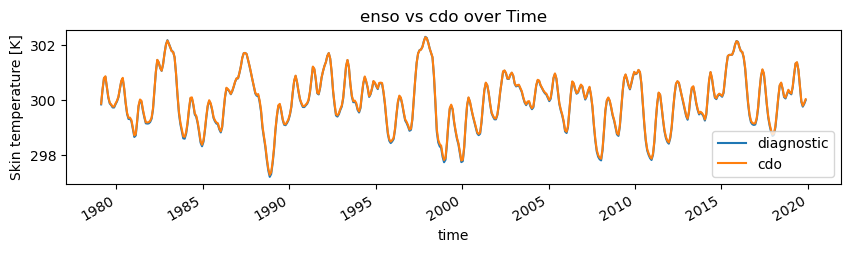

In [27]:
# Plot with matplotlib
fig = plt.figure(figsize=(10,2))

enso.plot(label='diagnostic')
cdo_enso.plot(label='cdo')
plt.legend()
plt.title('enso vs cdo over Time')
plt.show()

## Absolute error between the two methods

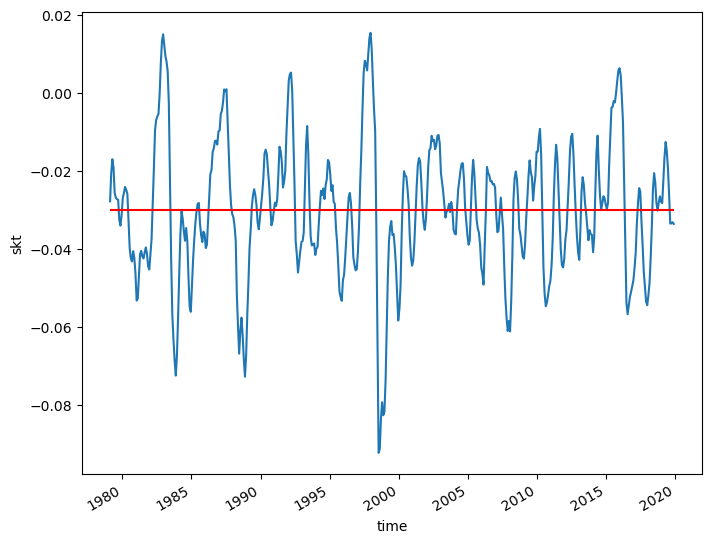

In [43]:
enso_diff = enso-cdo_enso
mean_diff = enso_diff.mean(dim='time')

fig, ax = plt.subplots(figsize=(8, 6))

enso_diff.plot(ax=ax)
ax.hlines(y=mean_diff,xmin=min(enso_diff['time']),xmax=max(enso_diff['time']),color='red')

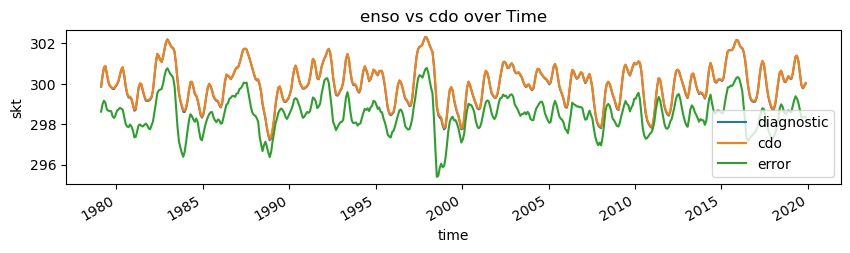

In [37]:
# Plot with matplotlib
fig = plt.figure(figsize=(10,2))

enso.plot(label='diagnostic')
cdo_enso.plot(label='cdo')
((enso_diff*50+300)).plot(label='error')
plt.legend()
plt.title('enso vs cdo over Time')
plt.show()